# 1 Download the bitstream file

In [1]:
from pynq import Overlay
Overlay("top.bit").download()

# 2 Download the bin file

In [2]:
from pynq.iop import Pmod_HMC5883L
from pynq.iop import PMODA

myiic = Pmod_HMC5883L(PMODA)

# 3 Plot the Loging

## 3.1 Plot Function

In [11]:
import matplotlib.pyplot as plt 
def HMC5883L(log):
    %matplotlib inline     
    plt.plot(range(len(log)), log, 'ro') # 'r' 'ro'
    plt.title('HMC5883L Sensor log')
    plt.axis([0, len(log), min(log), max(log)])
    plt.bar(range(len(log)), log, facecolor='#9999ff', edgecolor='white',width = 0.3)
    plt.xlabel('Ponits')
    plt.ylabel('Values')
    plt.show()

## 3.2 Loging and Ploting 

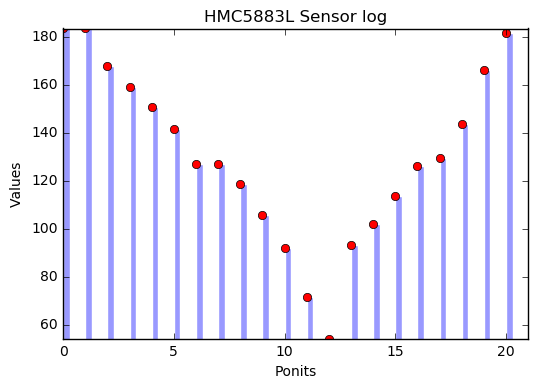

In [12]:
from ipywidgets import *
from IPython.display import display

items_layout = Layout(flex='1 1 auto', width='auto')     # override the default width of the button to 'auto' to let the button grow
items = [
    Button(description='Start Log', layout=Layout(flex='2 1 auto', width='50%')),
    Button(description='Stop Log', layout=Layout(flex='2 1 auto', width='50%')),  
    Button(description='Plot Log', layout=Layout(flex='2 1 auto', width='50%')), 
 ]
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    border='solid',
                    width='60%')
def on_button_clicked(b):
    myiic.start_log()
items[0].on_click(on_button_clicked)

def on_button_clicked(b):
    myiic.stop_log()    
items[1].on_click(on_button_clicked)
def on_button_clicked(b):
    log = myiic.get_log()
    HMC5883L(log)  
items[2].on_click(on_button_clicked)
box = Box(children=items, layout=box_layout)
box